<h1>Chapter 4: Training Models</h1>
<h2>4.1 Introduction</h2>
<p>Here, we will look at the linear regression model, and discuss two different ways to train it:</p>
<ul>
    <li>Using a closed-form equation that directly computes the model parameters that best fit the model to the training set
         (i.e. the model parameters that minimise the cost function over the training set). </li>
    <li>Using an iterative optimisation approach called Gradient Descent (GD) that gradually tweaks the parameters to minimise the cost function over the training set, eventually converging to the same set of parameters as the first method. 
</ul>

<h2>4.2 Linear Regression</h2>
<p>Recall that training a model means settings its parameters so that the model best fits the training data. Previously, we seen that the most common performance measure for a regression model is the RMSE. Therefore, to train a linear regression model, we need to find a value for the model parameter theta that minimises the RMSE. </p>

<h3>4.2.1 The Normal Equation</h3>
<p>To find the value of theta theta that minimises the MSE, there exists a closed-form solution. This is called the <em>Normal equation</em>.</p>

In [1]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3*X + np.random.randn(m, 1)

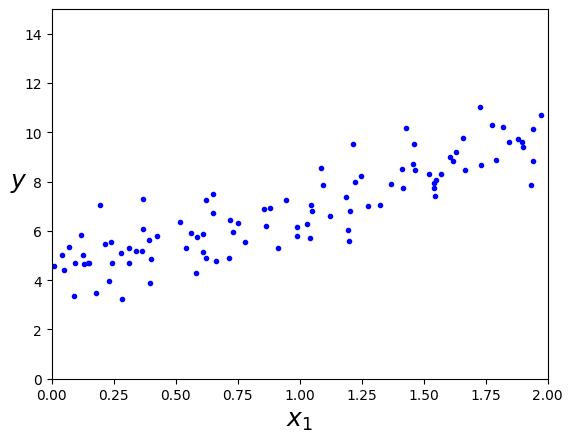

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

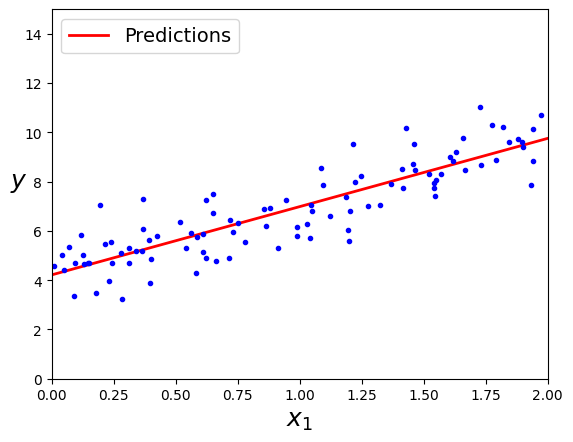

In [5]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

<h3>4.2.2 Linear Regression using Scikit-Learn</h3>

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

<h2>4.3 Gradient Descent</h3>
<p><em>Gradient Descent</em> is a generic optimisation algorithm capable of finding optimal solutions to a wide range of problems. The general idea of GD is to tweak parameters iteratively in order to minimise a cost function. </p>

<p>In practice, you start by filling theta with random values (this is called <em>random initialisation</em>). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g. the MSE), until the algorithm converges to a minimum. </p>

<p>An important parameter in gradient descent is the size of the steps, determined by the <em>learning rate</em> hyperparameter. If this is too small, then the algorithm will have to go through many iterations to converge. If it is too high, then you might jump across the valley and miss the minimum. </p>

<h3>4.3.1 Batch Gradient Descent</h3>
<p>To implement GD, you have to compute the gradient of the cost function wrt each model parameter, which is a partial derivative. Instead of doing this individually, we just use the gradient. </p>

In [8]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

<p>This is what the Normal Equation found. But, what if we used a different learning rate? </p>

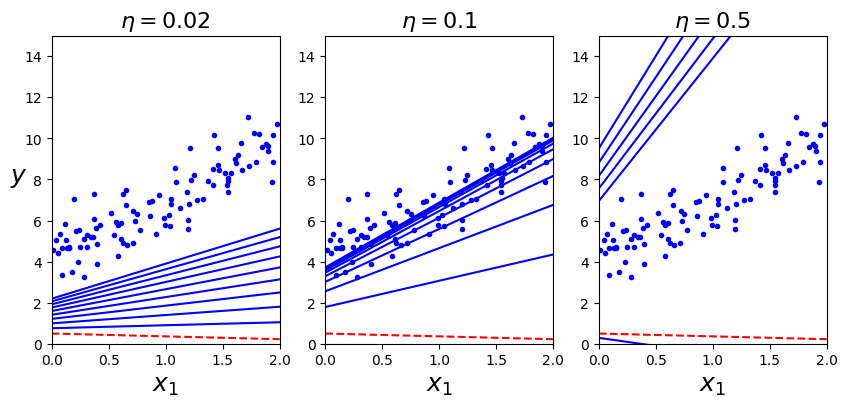

In [9]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

<ol>
    <li>On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will tke ages. </li>
    <li>In the middle, the learning rate looks pretty good. In just a few epochs,  it has already converged to the solution. </li>
    <li>On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. </li>
</ol>


<h3>4.3.2 Stochastic Gradient Descent</h3>
<p>The main problem with batch GD is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, <em>Stochastic Gradient Descent</em> picks a random instance in the training set at every step and computes the gradients based on only that single instance. This makes the algorithm much faster, as it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in the memory at each iteration. </p>

<p>On the other hand, due to the stochastic nature of the algorithm, it is much less regular than batch. Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it'll end up very close to the minimum, but once it gets there it'll continue to bounce around, never settling down. Once the algorithm stops, the final parameter values will be good, but not optimal.</p>

<p>When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic GD has a better chance of finding the global minimum than batch GD. Randomness is therefore good to escape from local optima, but bad because it means that the algorithm can never really settle at a minimum. </p>

<p>One solution to this dilemma is to gradually reduce the learning rate. The step starts out large (helping make quick progress, and escaping local minima), then gets smaller and smaller, allowing the algorithm to settle at the global minimum. This process is similar to <em>simulated annealing</em>, an algorithm inspired by the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the <em>learning schedule</em>. If the learning rate is too quickly reduced, you may get stuck at a local minimum, or even end up frozen halfway to the minimum. If it is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early. </p>

<p>Next, we look at implementing stochastic GD using a simple learning schedule:</p>

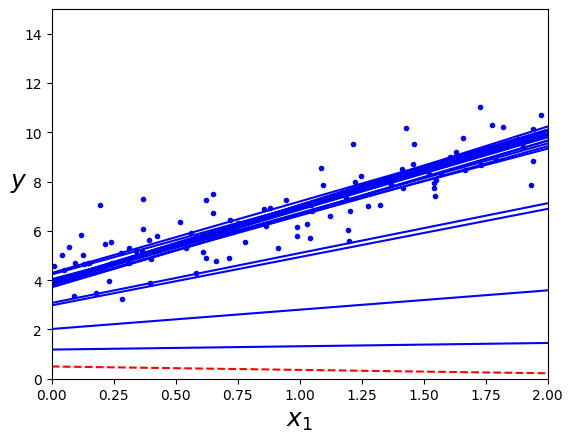

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                              
plt.show()            

<p>By convention, we iterate by rounds of <em>m</em> iterations; each round by an <em>epoch</em>. While the batch GD code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times, reaching the following solution:</p>

In [11]:
theta

array([[4.21076011],
       [2.74856079]])

<p>To perform Linear Regression using  Stochastic Gradient Descent with Scikit-Learn, we can use the SGDRegressor class, which defaults to optimise the MSE cost function. </p>

<p>The following will run for maximum 1,000 epochs (max_iter), or unless the loss drops by less than 10^(-5) during 100 epochs. It starts with a learning rate of 0.01 (eta0), using the default learning schedule.</p>

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

<h3>4.3.3 Mini-batch Gradient Descent</h3>

<p>Mini-batch Gradient Descent is straightforward, once you know batch and stochastic gradient descent: at each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), we compute the gradients on small random sets of instances called <em>mini-batches</em>. The main advantage of mini-batch over stochastic is that you can get a performance boost from hardware optimisation of matrix operations, especially using GPUS. </p>

In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [15]:
theta

array([[4.25214635],
       [2.7896408 ]])

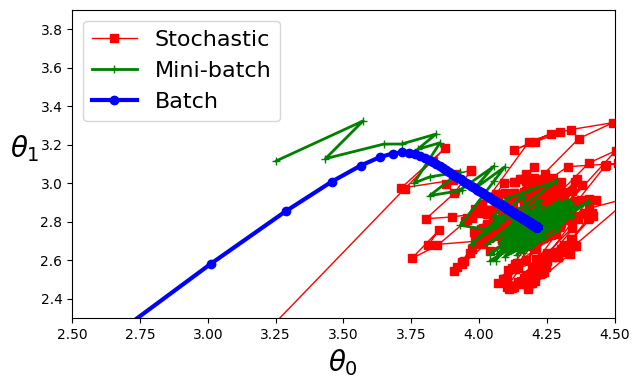

In [16]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<h2>4.4 Polynomial Regression</h2>
<p>If your data is more complex than a straight line, you can still use a linear model to fit non-linear data. </p>

<p>A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called <em>polynomial regression</em>. </p>

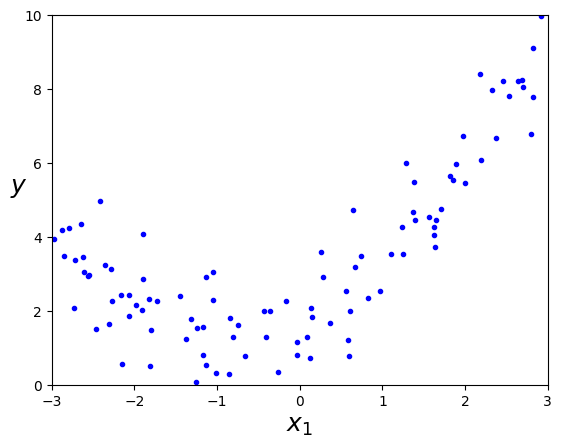

In [17]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>Clearly, a straight line will never fit this data properly. </p>

<p>We can use Scikit-Learn's PolynomialFeatures class to transform the training data, adding the square of each feature as a new feature. </p>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

<p>X_poly now contains the original feature of X plus the square of this feature. Now, we can fit a LinearRegression model to this extended training data:</p>

In [19]:
lin_reg  = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

<p>The model estimates y=0.56x^2+0.093x+1.78, while the original function was y=0.5x^2+x+2+Gaussian noise.</p>

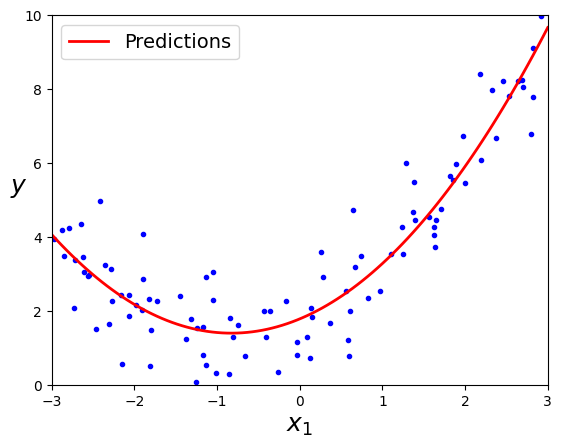

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>When there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression model cannot do. </p>

<h2>4.5 Learning Curves</h2>
<p>If you perform high-degree polynomial regression, you will likely fit the training data much better than with plain linear regression. </p>

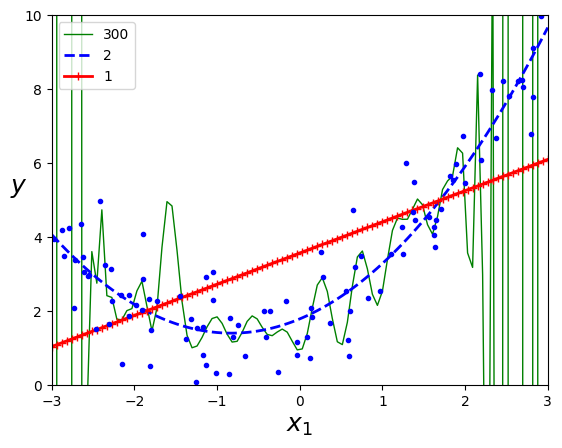

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<p>For example, the above plot shows a 300-degree polynomial model being applied to the preceding training data, comparing the result with a pure linear model and a quadratic model. Notice how the 300-degree polynomial wiggles around to get as close to the training instances as possible. </p>

<p>This high-degree polynomial regression model is obviously severely overfitting the training data, while the linear model is underfitting it. The model that will generalise best in this case is the quadratic model. </p>

<p>But in general you won't know function generated the data, so how can you decide how complex your model should be? We had previously used cross-validation for classification. If a model performs well on the training data, but generalises poorly according to the cross-validation metrics, then the model is overfitting. It performs poorly on both, then it is underfitting. This is one way to tell if the model is too complex or simple. </p>

<p>Another way to tell is to look at the <em>learning curves</em>, which are plots of a model's training errors and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results. If the model can't be training incrementally, then you must train it several times on gradually larger subsets of the training set. </p>

<p>Scikit-Learn has a useful learning_curve() function to help with this. It trains and evaluates the model using cross-validation. By default, it retrains the model on growing subsets of the training set, but if the model supports incrementally learning you can set exploit_incrementally_learning=True when calling learning_curve() and it will train the model incrementally instead. </p>

<p>The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold. </p>

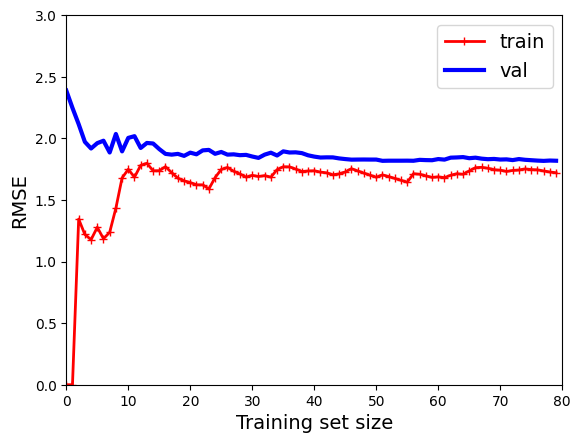

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

<p>This model is underfitting. To see why, let's first look at the training error. </p>

<p>When there are just one or two instances in the training set, the model can fit them perfectly. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. </p>

<p>Now let's look at the validation error. When the model is trained on very few training instances, it is incapable of generalising properly, which is why the validation error is initially quite large. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job of modelling the data, so the error stands at a plateau, very close to the other curve. </p>

<p>These learning curves are typical of a model that is underfitting. Both curves have reached a plateau; they are close and fairly high. </p>

<p>Now let's look at the learning curves of a 10th-degree polynomial model on the same data:</p>

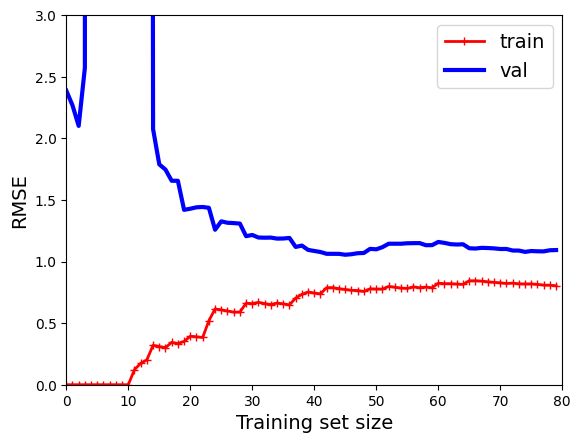

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])         
plt.show()      

<p>Here, the error is much lower than before. There is also a gap between the curves, meaning the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. </p>

<p>If, however, we used a much large training set, then the curves would continue to get closer. </p>

<h2>4.6 Regularised Linear Models</h2>
<p>A good way to reduce overfitting is to regularise the model (i.e. to constrain it): the fewer degrees of freedom, the harder it will be to overfit the data. A simple way to regularise a polynomial model is to reduce the number of polynomial degrees. </p>

<p>For a linear model, regularisation is typically achieved by constraining the weights of the model. </p>

<h3>4.6.1 Ridge Regression</h3>
<p>This is a regularised version of linear regression, wherby a regression term is added to the MSE. The forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The regularisation term should only be added to the cost function during training, and the unregularised MSE used after training to evaluate the model performance. </p>

<p>Within the regularisation term, there is a paramter alpha, which controls how much we want to regularise the model. If this is zero, then ridge regression is just linear regression. If it is very large, then all weights end up very close to zero, and the result is a flat line going through the data's mean. </p>

In [24]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [25]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

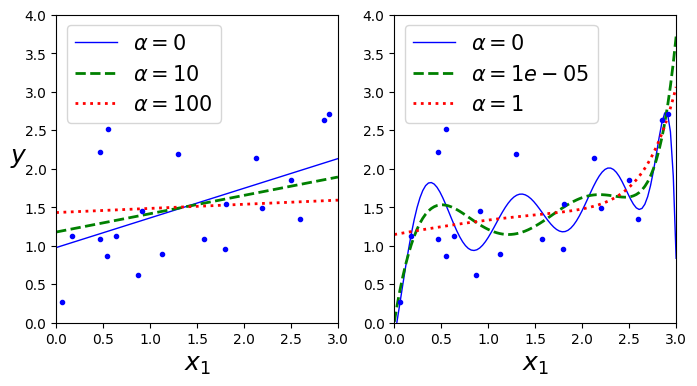

In [26]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

<p>The above plot shows several ridge models that were trained on some very noisy linear data using different alpha values. </p>

<p>On the left side, plain ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the ridge models are applied to the resulting features: this is polynomial regression with ridge regularisation. </p>

<h3>4.6.2 Lasso Regression</h3>
<p><em>Least Absolute Shrinkage and Selection Operation Regression</em> or <em>Lasso Regression</em> is another regularised version of linear regression: just like ridge regression, it adds a regularisation term to the cost function, but it uses a different norm of the weight vector. </p>

C:\Users\Lee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


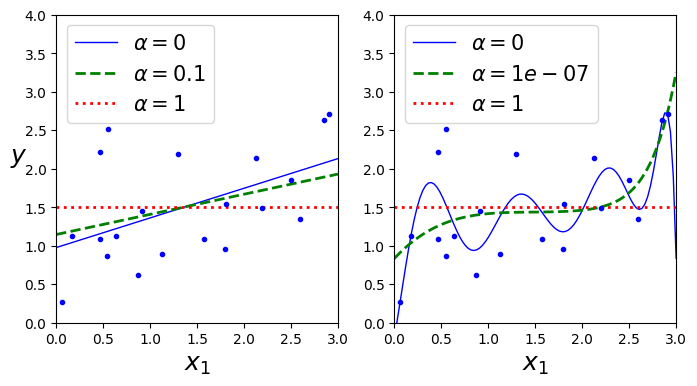

In [27]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()